In [4]:
!pip install numpy

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [6]:
#to avoid encoding error use 'unicode_escape'
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [7]:
#returns number of rows and columns in the given file
df.shape


(11251, 15)

# DATA CLEANING

In [8]:
#shows top 5 rows of the file
#can input number un the bracket to display that amount of rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
#to get the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#drop unwanted/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
#to check null values fro data cleaning
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
#drop null values
#inplace=True is used to save the drop changes
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
#change the data type
df['Amount']=df['Amount'].astype('int')

In [17]:
df['Amount'].dtypes

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
#use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis(EDA)

# Gender

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

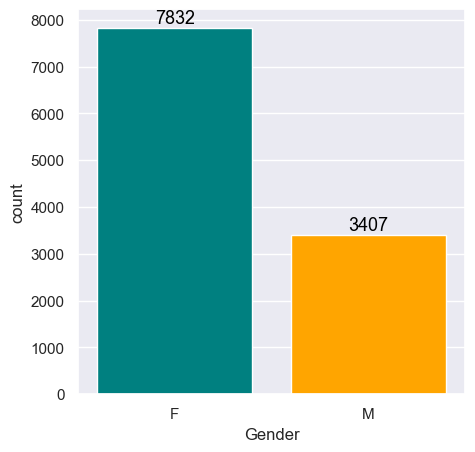

In [68]:
#'Gender' is a column in our DataFrame df
ax = sns.countplot(x='Gender', data=df)

# Define colors for each bar
colors = ['teal' if bar.get_height() > df['Gender'].value_counts().median() else 'orange' for bar in ax.patches]
sns.set(rc={'figure.figsize':(5,5)})
# Set colors for the bars
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# Add labels to the bars with custom colors
for bars in ax.containers:
    ax.bar_label(bars, color='black', fontsize=13)



In [54]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


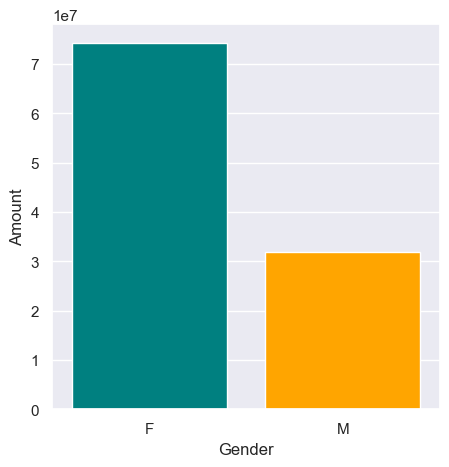

In [85]:
#'Gender' is a column in our DataFrame df
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Define colors for each bar based on the 'Amount'
colors = ['teal' if amount > sales_gen['Amount'].median() else 'orange' for amount in sales_gen['Amount']]

# Create a bar plot with custom colors
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=colors)
sns.set(rc={'figure.figsize':(5,5)})

# Add labels to the bars with custom colors
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than man

# Age

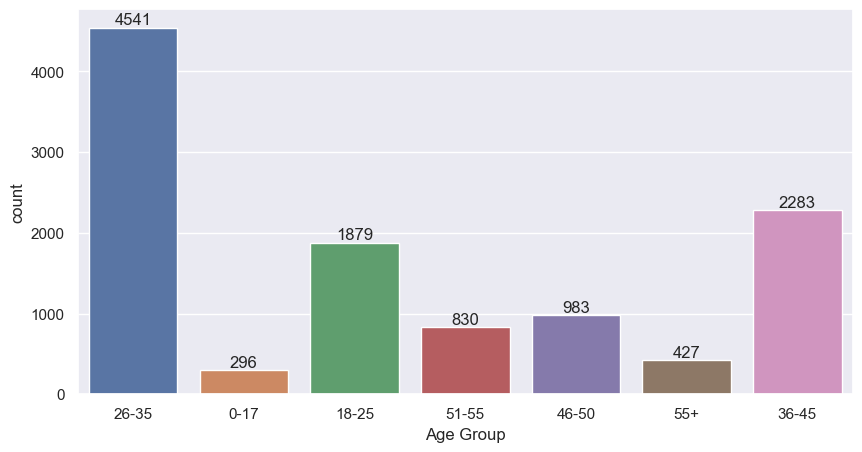

In [88]:
#sales depending on age group
ax=sns.countplot(data=df,x='Age Group')
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

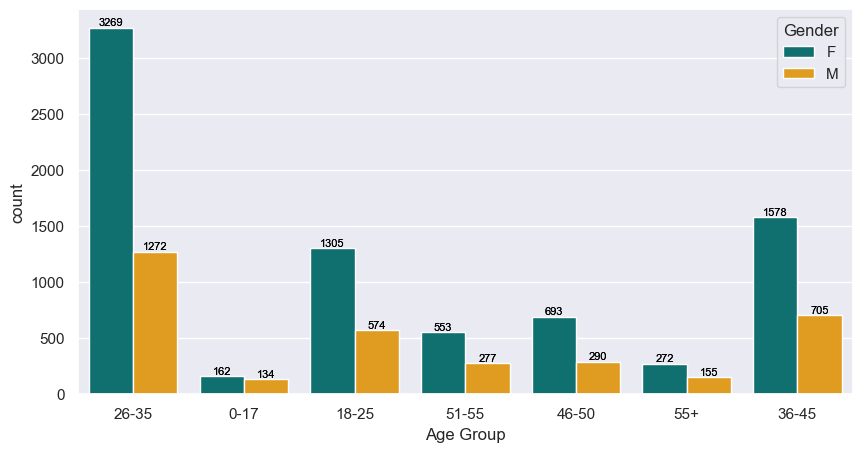

In [87]:
#sales depending on age group and gender
colors = ["teal", "orange"]
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette=colors)
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
   for bars in ax.containers:
    ax.bar_label(bars, color='black', fontsize=8)

<Axes: xlabel='Age Group', ylabel='Amount'>

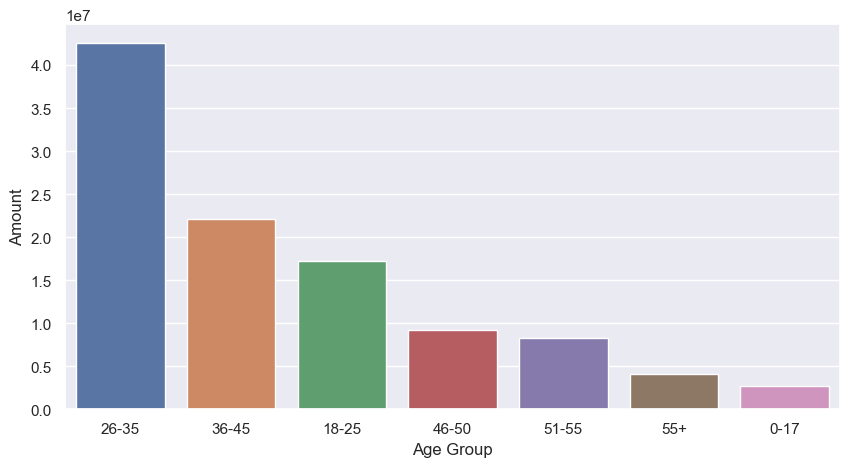

In [89]:
#Total Amount vs Age Group
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs females

# State

<Axes: xlabel='State', ylabel='Orders'>

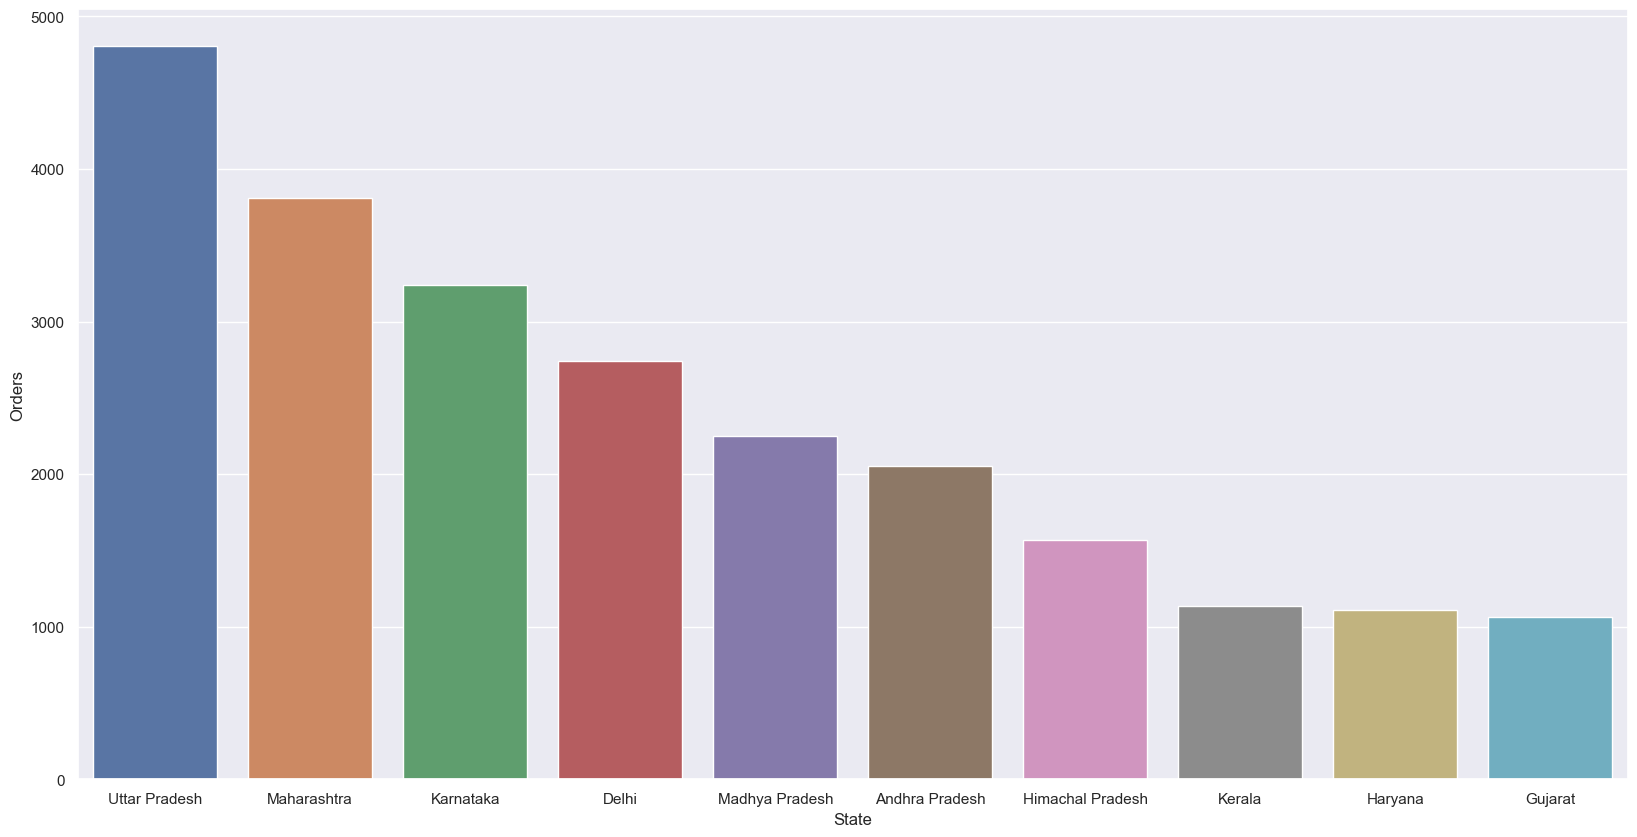

In [126]:
#total number of orders from top 10 states
#USE VALUE INSIDE HEAD TO CHANGE THE NUMBER OF STATES
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=sales_state,x='State',y='Orders')


<Axes: xlabel='State', ylabel='Amount'>

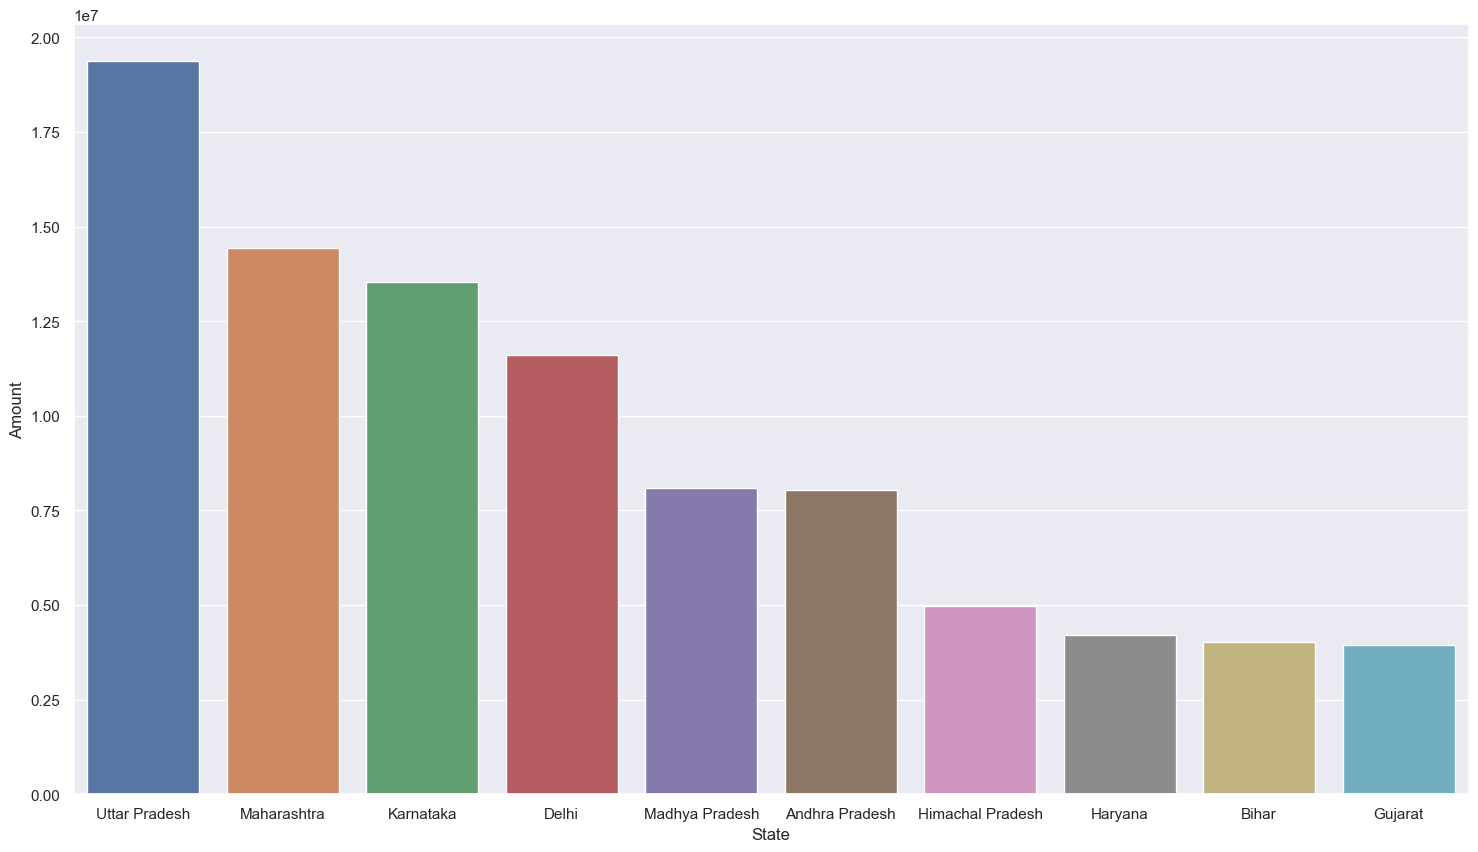

In [125]:
#total amount/sales from top 10 states
#USE VALUE INSIDE HEAD TO CHANGE THE NUMBER OF STATES
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,10)})
sns.barplot(data=sales_state,x='State',y='Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

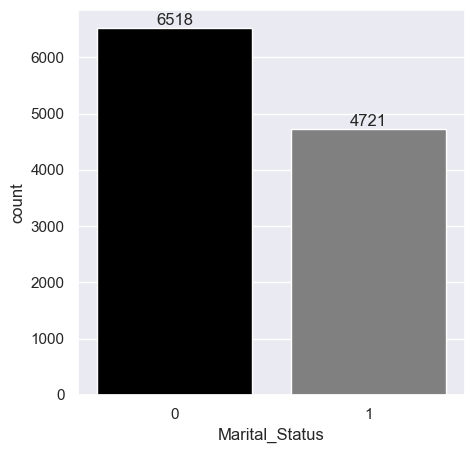

In [103]:
ax = sns.countplot(data=df, x='Marital_Status', palette=['black', 'grey'])
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

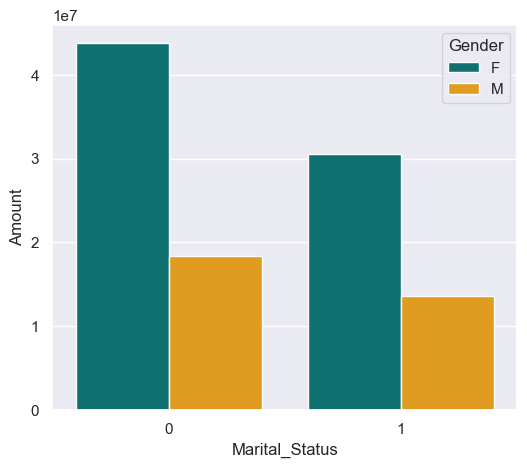

In [104]:
# Assuming sales_state is your DataFrame
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set the color palette to teal and orange
colors = ['teal', 'orange']

sns.set(rc={'figure.figsize': (6, 5)})
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette=colors)

From above graphs we can see that most of the buyers are married(women) and they have high purchasing power

# Occupation

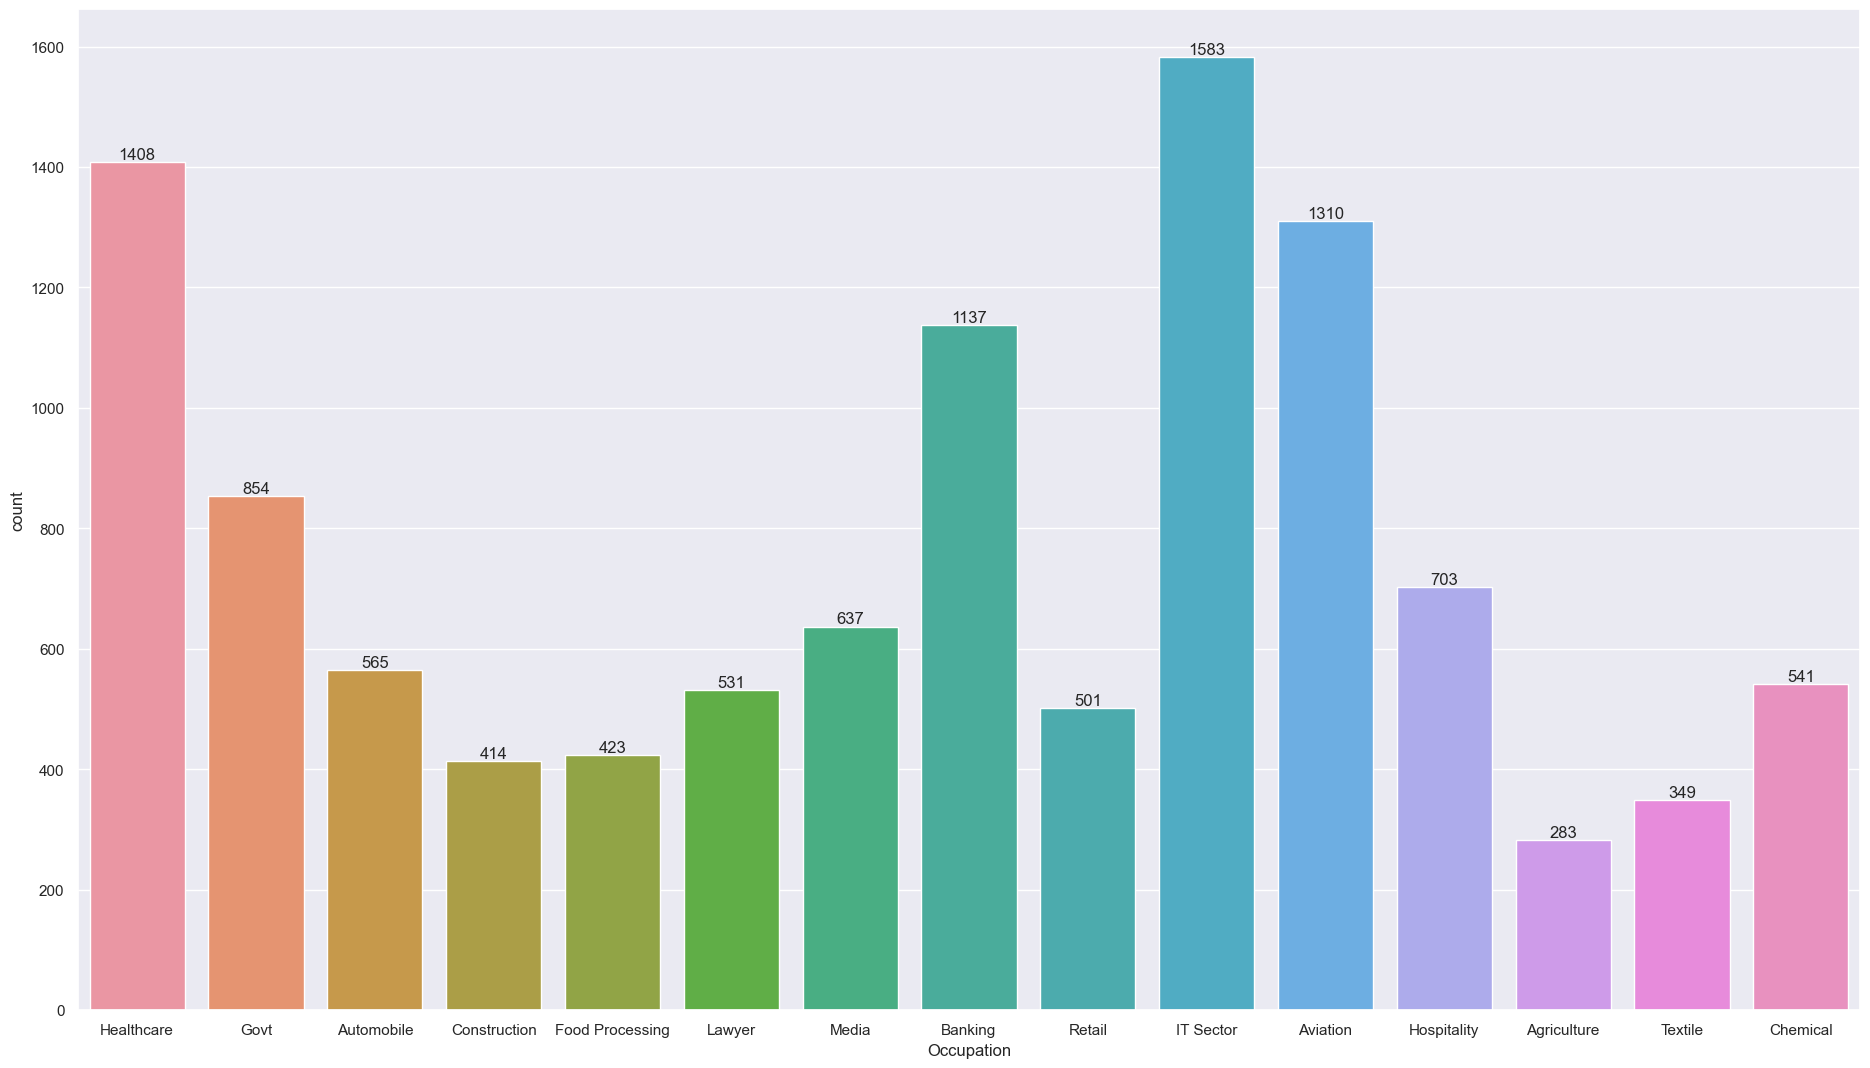

In [113]:
sns.set(rc={'figure.figsize':(23,13)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

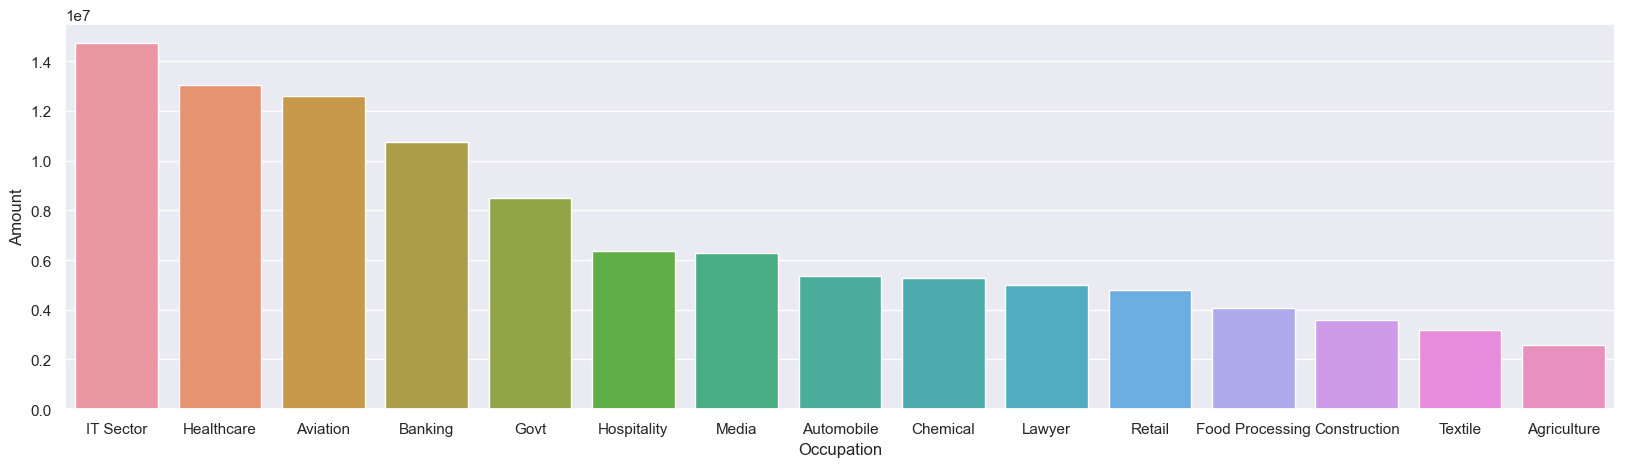

In [32]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare

# Product Category

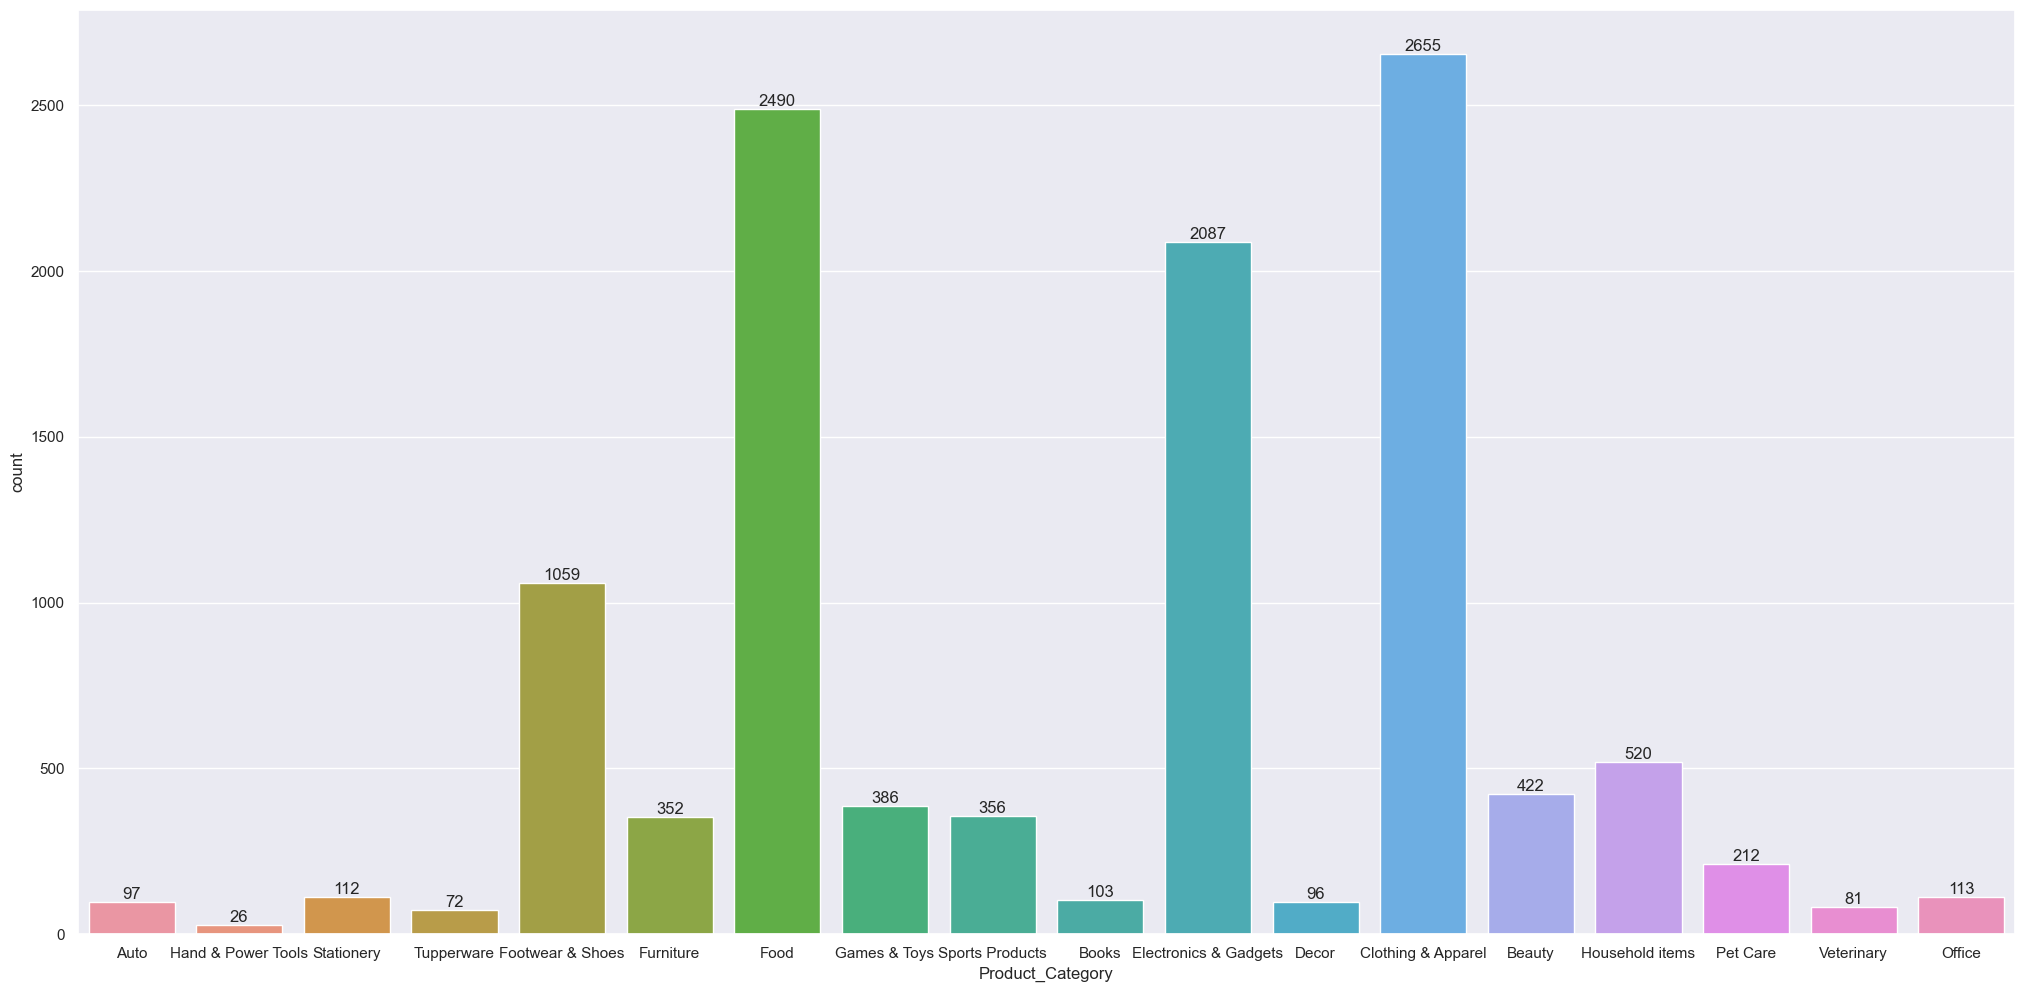

In [117]:
sns.set(rc={'figure.figsize':(25,12)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

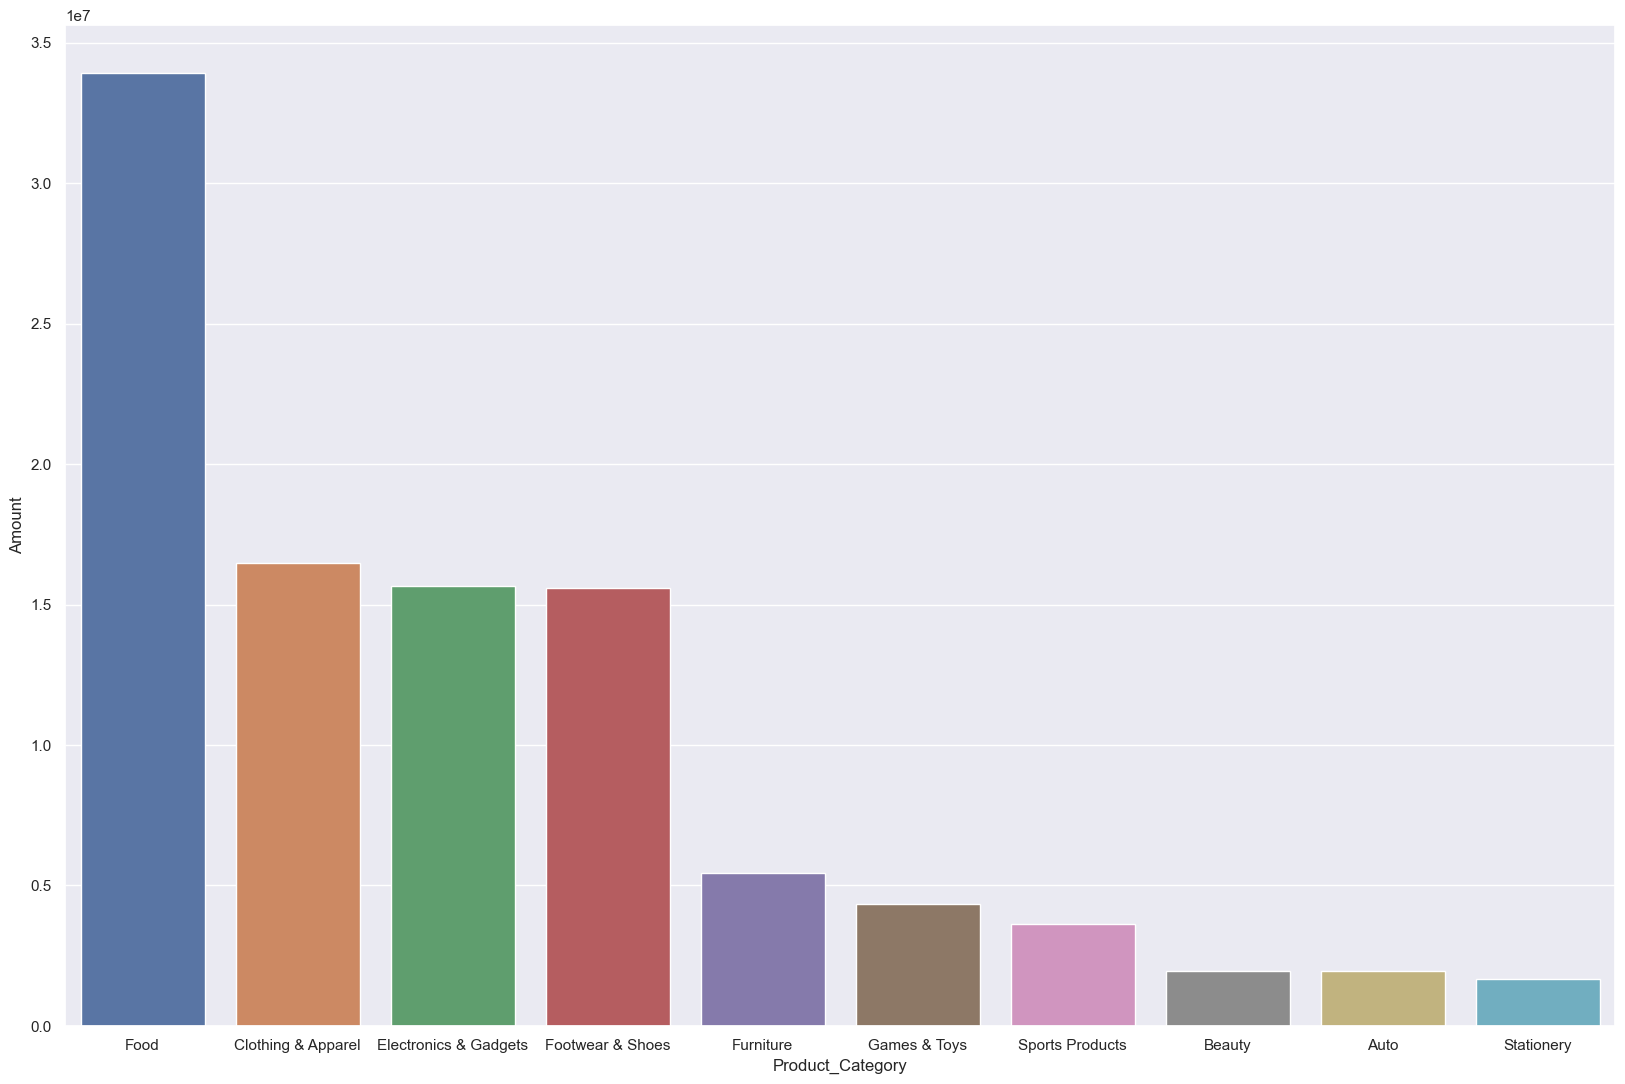

In [118]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,13)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

From above graphs we can see that most of the sold products are from Food,Footwear and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

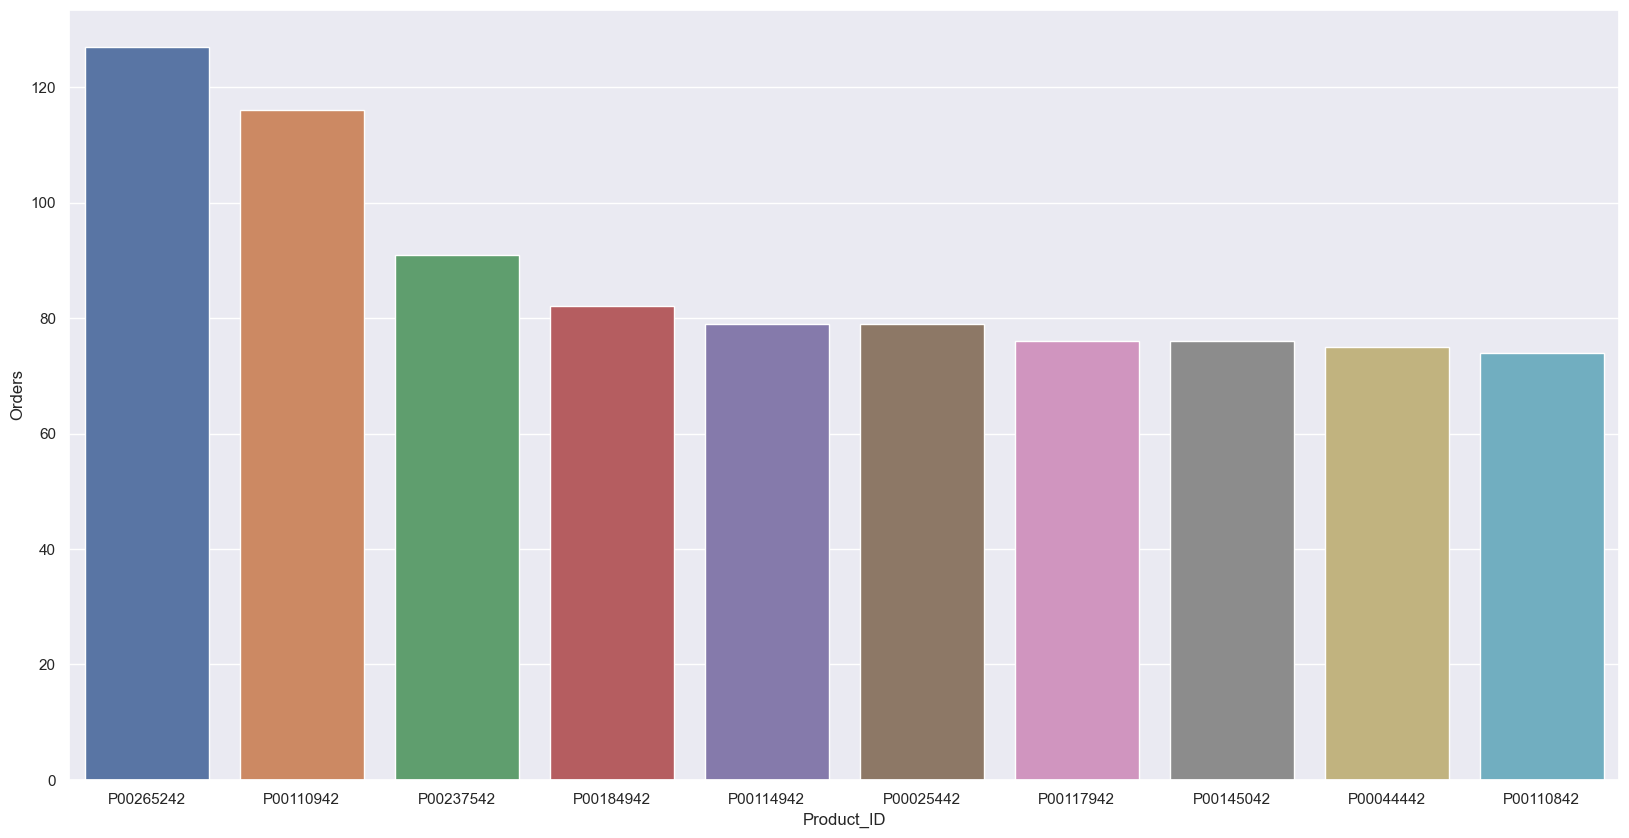

In [119]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

<Axes: xlabel='Product_ID'>

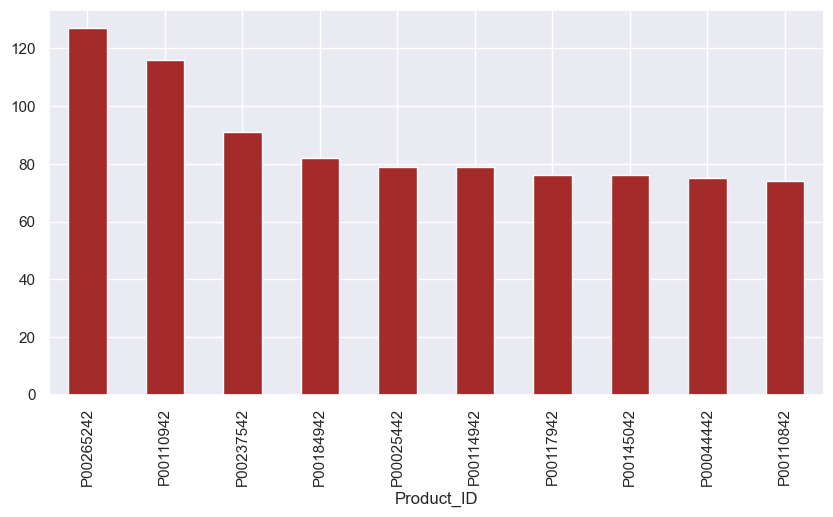

In [129]:
#top 10 most sold products
fig1, ax1 = plt.subplots(figsize=(10, 5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color='brown')

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category